# Making Sounds !!!

In [3]:
import math
import librosa
import numpy as np
from scipy import signal
import IPython.display as ipd
import matplotlib.pyplot as plt

### Sample Rate:

Sample rate is the number of samples of audio carried per second, We use 44100 because its the default sampling rate used in most audio systems https://en.wikipedia.org/wiki/44,100_Hz

& Pi we all love Pi

In [2]:
SAMPLE_RATE=44100
PI = np.pi

In [4]:
duration=1
amp=1E4

# The total number of sample points that define your sound
nsamples = int(duration * SAMPLE_RATE)

# Range of the sound: nsamples points equaly spaced in the range
sample_space = np.linspace(0, duration, nsamples, endpoint=False)

def angular_freq(frequency):
    return 2*PI*frequency*sample_space

### Shape of Waveforms

- Sine wave
- Square wave
- Sawtooth Wave

In [4]:
frequency = 5
# Sine wave
sine_wave_data = np.sin(angular_freq(frequency))*amp
# Square Wave
square_wave_data = signal.square(angular_freq(frequency))*amp
# Triangle Wave
tri_wave_data = signal.sawtooth(angular_freq(frequency),  width=0.5)*amp
# SawTooth Wave
saw_wave_data = signal.sawtooth(angular_freq(frequency))*amp

### Bit Depth

We are using 16-bit, which is the number of bits available for us to measure and map sound wave amplitude values. "High-resolution” in the music industry is given to 24-bit audio but for our sasta synth 16 bit is fine. Bit depth is all about noise, and the more bits of data you have to store audio, the less quantization noise will be introduced into your recording

Play the tone created by the waveforma nd Notice how different waveforms shape have their own unique sound

In [5]:
# Normalization: to conform to music format: 16-bit integer
tone = sine_wave_data.astype(np.int16)
ipd.Audio(tone, rate=SAMPLE_RATE)

Plotting the Waveforms

Text(0.5, 1.0, 'Sawtooth Wave')

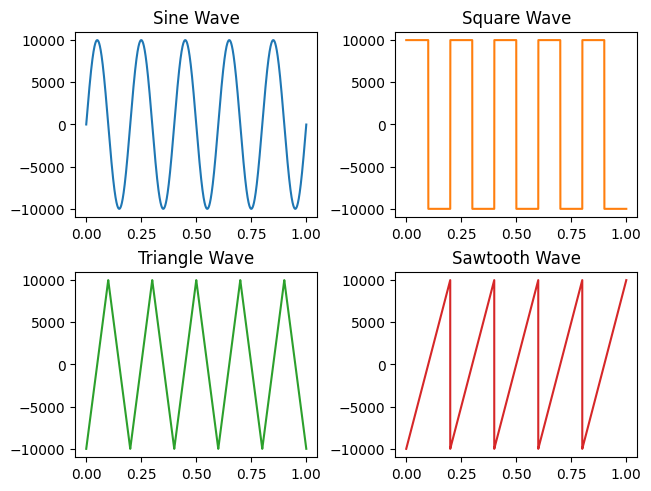

In [7]:
fig, axs = plt.subplots(2, 2, constrained_layout=True)
axs[0, 0].plot(sample_space, sine_wave_data)
axs[0, 0].set_title('Sine Wave')
axs[0, 1].plot(sample_space, square_wave_data, 'tab:orange')
axs[0, 1].set_title('Square Wave')
axs[1, 0].plot(sample_space, tri_wave_data, 'tab:green')
axs[1, 0].set_title('Triangle Wave')
axs[1, 1].plot(sample_space, saw_wave_data, 'tab:red')
axs[1, 1].set_title('Sawtooth Wave')

### Stack Sounds

To play these notes one after the other, frequencies need to be stacked Horizontally to create a Sequence


In [8]:
# Frequency 100Hz to 400Hz
tone1 = (np.sin(angular_freq(100))*amp).astype(np.int16)
tone2 = (np.sin(angular_freq(200))*amp).astype(np.int16)
tone3 = (np.sin(angular_freq(300))*amp).astype(np.int16)
tone4 = (np.sin(angular_freq(400))*amp).astype(np.int16)

sequence = np.hstack([tone1,tone2,tone3, tone4])

In [9]:
# Sequence Sound
ipd.Audio(sequence, rate=SAMPLE_RATE)

In [ ]:
# frequencies = librosa.note_to_hz(['A3', 'A4', 'A5'])
# print(frequencies)